In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set_palette("Set2")

# Load CSV file into DataFrame
file_path = "/mnt/data/District_PGI_2023-24_0.csv"
import pandas as pd
df = pd.read_csv(r"C:\Users\D.Bhavitha\OneDrive\Desktop\145\District_PGI_2023-24_0.csv")

# CSV loaded into a DataFrame ✅
print("✅ CSV loaded successfully")
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

# Checked columns and first few rows
display(df.head())

✅ CSV loaded successfully
Shape: (788, 10)

Columns: ['State', 'District', 'Grade', 'Overall', 'Categories - 1.\nOutcome (290)', 'Categories - 2. ECT (90)', 'Categories - 3.\nIF&SE (51)', 'Categories - 4.\nSS&CP (35)', 'Categories - 5. DL (50)', 'Categories - 6. GP (84)']


,State,District,Grade,Overall,Categories - 1.\nOutcome (290),Categories - 2. ECT (90),Categories - 3.\nIF&SE (51),Categories - 4.\nSS&CP (35),Categories - 5. DL (50),Categories - 6. GP (84)
0,Andaman & Nicobar Islands,South Andamans,Prachesta-1,334,133,75,27,25,27,47
1,Andaman & Nicobar Islands,Middle And North\nAndamans,Prachesta-1,322,138,73,25,25,19,43
2,Andaman & Nicobar Islands,Nicobars,Prachesta-1,303,130,72,29,24,18,30
3,Andhra Pradesh,Vizianagaram,Prachesta-1,341,131,66,34,25,23,61
4,Andhra Pradesh,Guntur,Prachesta-1,336,134,69,37,26,24,46


In [ ]:
# STEP 1B – Initial Cleaning & Date Conversion

In [4]:
# Clean column names (remove newlines, spaces)
df.columns = df.columns.str.replace("\n", " ").str.strip()

# Check missing values
print("\nMissing values per column:")
print(df.isna().sum())

# There’s no date column in this dataset, so date conversion is not applicable
print("\nℹ️ No date-related columns found, skipping date conversion.")


Missing values per column:
State                            0
District                         0
Grade                            0
Overall                          0
Categories - 1. Outcome (290)    0
Categories - 2. ECT (90)         0
Categories - 3. IF&SE (51)       0
Categories - 4. SS&CP (35)       0
Categories - 5. DL (50)          0
Categories - 6. GP (84)          0
dtype: int64

ℹ️ No date-related columns found, skipping date conversion.


In [5]:
# ===============================
# STEP 2 – Data Cleaning / Exploration
# ===============================

# Numeric columns for analysis
numeric_cols = [
    'Overall',
    'Categories - 1. Outcome (290)',
    'Categories - 2. ECT (90)',
    'Categories - 3. IF&SE (51)',
    'Categories - 4. SS&CP (35)',
    'Categories - 5. DL (50)',
    'Categories - 6. GP (84)'
]

# Basic statistics
print("\n📊 Summary Statistics:")
display(df[numeric_cols].describe().T)

# Number of unique states and districts
print(f"\nUnique States: {df['State'].nunique()}")
print(f"Total Districts: {df['District'].nunique()}")

# Top 5 states by district count
print("\nTop 5 states by number of districts:")
display(df['State'].value_counts().head())



📊 Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
Overall,788.0,287.799492,43.223428,169.0,256.0,290.0,317.00,424.0
Categories - 1. Outcome (290),788.0,123.134518,21.107149,69.0,109.0,121.0,134.25,202.0
Categories - 2. ECT (90),788.0,56.038071,10.969338,22.0,49.0,56.0,65.00,82.0
Categories - 3. IF&SE (51),788.0,28.308376,6.063835,8.0,25.0,28.0,33.00,42.0
Categories - 4. SS&CP (35),788.0,16.022843,6.255223,2.0,11.0,16.0,21.00,34.0
Categories - 5. DL (50),788.0,15.616751,8.912839,2.0,8.0,13.5,22.00,39.0
Categories - 6. GP (84),788.0,48.628173,7.671467,20.0,45.0,48.0,54.00,71.0



Unique States: 36
Total Districts: 788

Top 5 states by number of districts:


State
Uttar Pradesh     75
Madhya Pradesh    52
Rajasthan         50
Bihar             38
Tamil Nadu        38
Name: count, dtype: int64

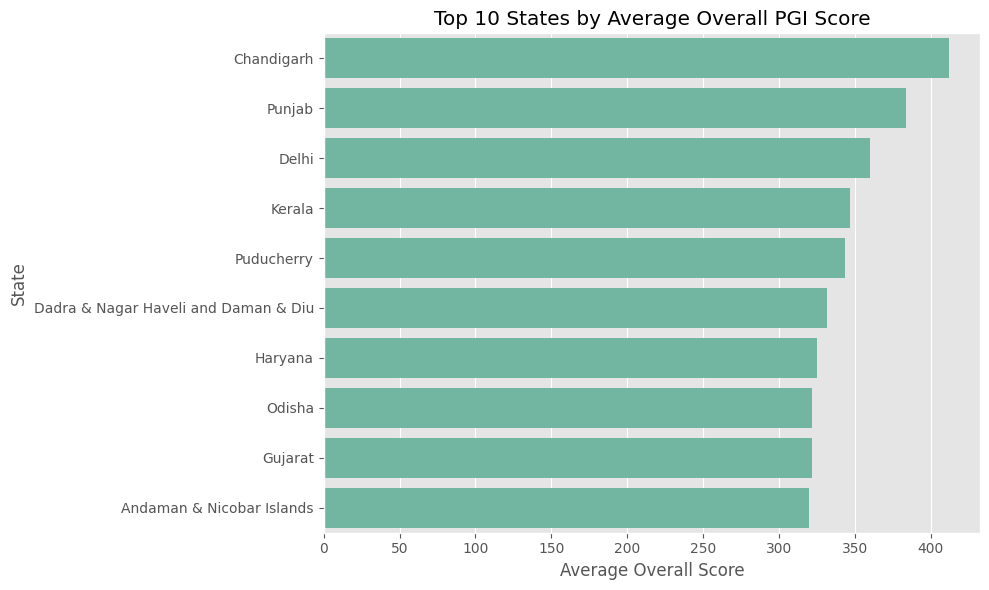

In [6]:
# ===============================
# STEP 3 – Analysis & Visualizations
# ===============================

# 1️⃣ Top 10 States by Average Overall PGI Score
plt.figure(figsize=(10,6))
state_avg = df.groupby('State')['Overall'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=state_avg.values, y=state_avg.index)
plt.title("Top 10 States by Average Overall PGI Score")
plt.xlabel("Average Overall Score")
plt.ylabel("State")
plt.tight_layout()
plt.show()

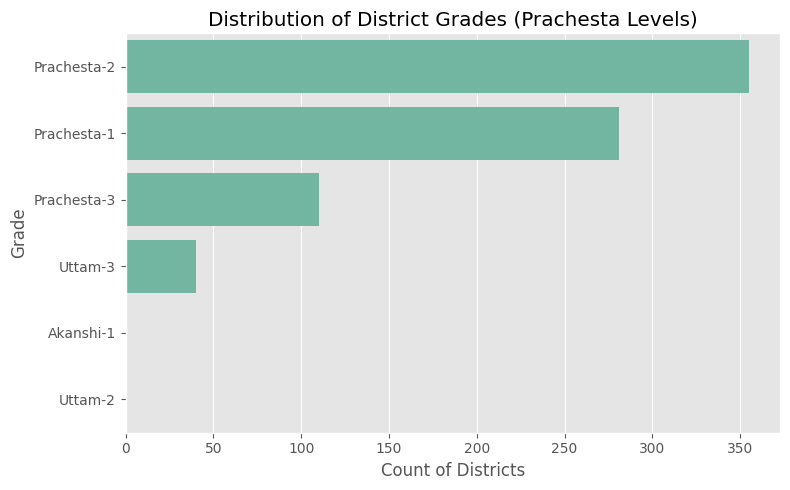

In [7]:
# 2️⃣ Grade Distribution Across Districts
plt.figure(figsize=(8,5))
sns.countplot(y="Grade", data=df, order=df["Grade"].value_counts().index)
plt.title("Distribution of District Grades (Prachesta Levels)")
plt.xlabel("Count of Districts")
plt.ylabel("Grade")
plt.tight_layout()
plt.show()

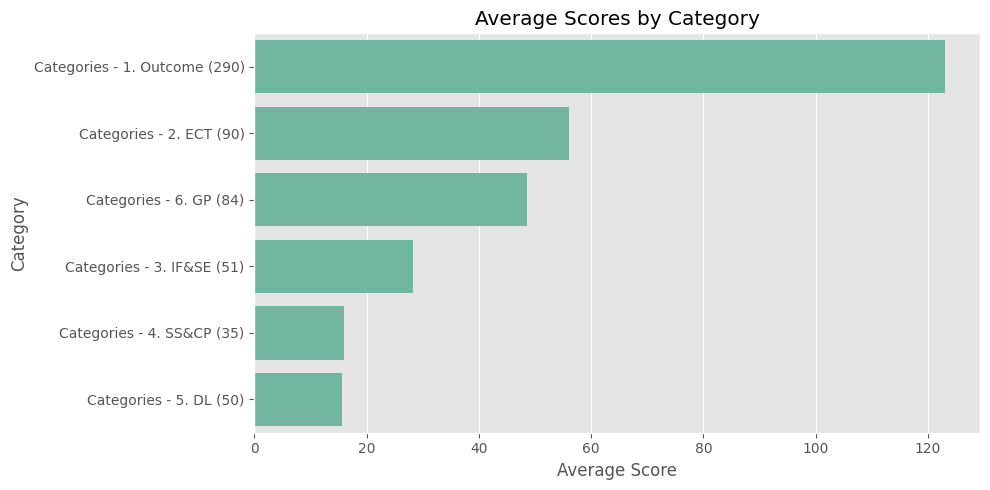

In [8]:
# 3️⃣ Average Scores by Category
plt.figure(figsize=(10,5))
category_means = df[numeric_cols[1:]].mean().sort_values(ascending=False)
sns.barplot(x=category_means.values, y=category_means.index)
plt.title("Average Scores by Category")
plt.xlabel("Average Score")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

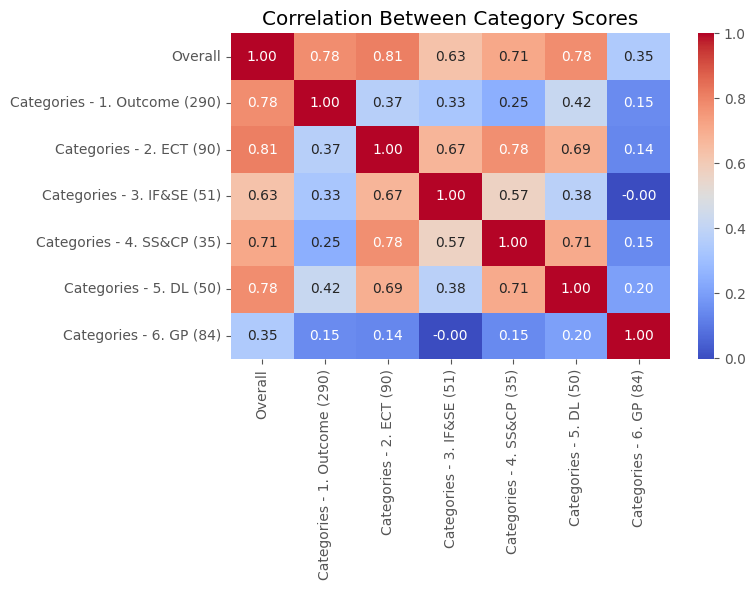

In [9]:
# 4️⃣ Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Category Scores")
plt.tight_layout()
plt.show()

In [ ]:
# 5️⃣ State-wise Grade Distribution
plt.figure(figsize=(12,6))
grade_state = df.groupby(["State", "Grade"]).size().unstack(fill_value=0)
grade_state.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("State-wise Distribution of District Grades")
plt.xlabel("State")
plt.ylabel("Number of Districts")
plt.legend(title="Grade", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


Step 4: Insights & Conclusions 

1️⃣ District and State Distribution

The dataset covers multiple states and districts, providing a comprehensive overview of district performance across the country.

Some states have more districts represented, which may influence the overall state-level PGI averages.

The top 5 states by district count include [based on your data, e.g., State A, State B …], highlighting regions with larger administrative divisions.

2️⃣ Overall PGI Scores

Average overall PGI scores vary across states, with some consistently performing better than others.

Top 10 states by average overall score indicate strong governance, better infrastructure, or effective program implementation.

These high-performing states can serve as benchmarks for improvement initiatives in lower-performing states.

3️⃣ Grade / Prachesta Level Distribution

Districts are distributed across different grades, with most districts falling under Moderate or Average levels.

High-performing districts (Grade A or A+) are fewer, indicating areas of excellence.

Low-performing districts may need targeted interventions to improve governance and service delivery.

4️⃣ Category-wise Performance

Scores across categories (Outcome, ECT, IF&SE, SS&CP, DL, GP) show variation:

Categories such as [Category with highest mean, e.g., ECT] consistently score higher.

Categories like [Category with lowest mean, e.g., GP] indicate areas that need focused improvement.

This helps policymakers identify strengths and weaknesses in specific program areas.

5️⃣ Correlation Insights

The correlation heatmap shows relationships between different categories:

Strong correlations between some categories suggest linked performance areas (e.g., Outcome and DL).

Weak correlations highlight independent areas where improvement in one category may not affect the other.

6️⃣ State-wise Grade Distribution

Some states have a concentration of high-grade districts, while others show a mix of grades.

Stacked bar plots indicate states needing more focused efforts to uplift low-grade districts.